In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/last-and-first-men-picture/Last_and_first_Men_picture.jpg
/kaggle/input/last-and-first-men/Last_and_First_Men.csv


In [2]:
#Import fastai.text
from fastai.text import *

In [3]:
#Making the dataset
df = pd.read_csv('../input/last-and-first-men/Last_and_First_Men.csv', sep='\t')
df.head()


,"LAW,AND,.,FIR$T"
0,",I,,"
1,"W.@l.AP$‘TAPl.DﬂU,,,"
2,"* A Distributed Proofreaders Canada eBook *,,,..."
3,"This,eBook,is,made,available,at,no,cost,and,wi..."
4,restrictions apply only if (1) you make a chan...


In [4]:
df.shape

(8751, 1)

In [5]:
df = df.reset_index(drop = True)

In [6]:
df.head()

,"LAW,AND,.,FIR$T"
0,",I,,"
1,"W.@l.AP$‘TAPl.DﬂU,,,"
2,"* A Distributed Proofreaders Canada eBook *,,,..."
3,"This,eBook,is,made,available,at,no,cost,and,wi..."
4,restrictions apply only if (1) you make a chan...


In [7]:
df.columns

Index(['LAW,AND,.,FIR$T'], dtype='object')

In [8]:
ncol=0
for col in df.columns:
    ncol+=1
print(ncol)

1


In [9]:
#rename of column
df=df.rename(columns={'LAW,AND,.,FIR$T':'text'})

In [10]:
df.head()

,text
0,",I,,"
1,"W.@l.AP$‘TAPl.DﬂU,,,"
2,"* A Distributed Proofreaders Canada eBook *,,,..."
3,"This,eBook,is,made,available,at,no,cost,and,wi..."
4,restrictions apply only if (1) you make a chan...


In [11]:
#making a language model only with our dataset
path = Path('../input/last-and-first-men')
bs = 64   # set batch size to 64, works for Kaggle Kernels
data_lm = (TextList.from_df(df, path, cols='text')
                .split_by_rand_pct(0.1)
                .label_for_lm()
                .databunch(bs=bs))

In [12]:
data_lm.show_batch()

idx,text
0,"in the ebook ( other than alteration for xxrep 13 , xxbos of these conditions xxunk , xxunk contact a https : / / xxunk xxunk xxrep 13 , xxbos before , xxunk . xxunk , xxunk , available , at xxbos https : / / xxunk . xxrep 13 , xxbos xxmaj this work is in the xxmaj xxunk public xxunk , but may be under xxunk in some"
1,", xxbos such an issue , and will , i hope , xxunk me for xxunk it , and using it as an early xxrep 13 , xxbos turning - point in the long drama of xxmaj man . xxrep 13 , xxbos xxmaj any , attempt , to , conceive , such , a , xxunk , take , into , account , whatever , xxbos contemporary science has"
2,"xxunk , constitution , of , his , world , kept , changing , so , rapidly , through , increased , , xxbos mastery over physical energy , that his primitive nature could no longer cope with the xxrep 14 , xxbos complexity of his environment . xxmaj animals that were fashioned for hunting and fighting in xxrep 14 , xxbos the wild were suddenly called upon to be"
3,"chastisement . xxunk , got , about , in , xxmaj paris , that , xxbos planes which would wreck xxmaj france from xxmaj xxunk to xxmaj xxunk . xxmaj and indeed the rumour xxrep 15 , xxbos was not wholly a xxunk , for , when the struggle began , the xxmaj british air force was found xxrep 15 , xxbos to have a range of intensive action far"
4,"17 , xxbos xxunk to the wealthy xxmaj west and the potentially wealthy xxmaj east . xxmaj the xxmaj british xxmaj empire xxrep 18 , xxbos xxunk , since , the , xxunk , that , held , it , xxunk , by , now , wholly , a , xxunk , of xxbos xxunk , xxmaj empire , was , not , xxunk , the , misfortune , of"


In [13]:
#traning our model with wikipedia model - transfer learning
learn = language_model_learner(data_lm, AWD_LSTM)
learn.fit_one_cycle(4, 1e-2)
learn.model_dir='/kaggle/working/'
learn.save('first_train_lm')
learn.save_encoder('first_train_encoder')

epoch,train_loss,valid_loss,accuracy,time
0,5.030639,3.906543,0.283437,03:01
1,4.287416,3.499819,0.351741,02:59
2,3.911971,3.429752,0.363571,02:58
3,3.718881,3.418752,0.364509,02:59


In [14]:
learn.show_results()

text,target,pred
"xxbos established species had wholly failed to get a xxunk in the new world , while certain xxrep 14 ,","xxbos xxunk , land , to , be , xxunk , of , xxunk , by , rain , and","xxbos xxunk , xxunk , and , xxunk , xxunk , xxunk , xxunk , xxunk , xxunk , xxunk"
"13 , xxbos vessels , though damaged , was able to return to the earth . xxmaj the xxunk xxunk","that xxrep 16 , xxbos xxmaj after the xxmaj xxunk revolution a new element appeared in xxmaj russian culture ,","of the 15 , xxbos xxunk the the xxmaj first , , few xxunk was . the america culture ."
"but with xxunk xxunk xxrep 14 , xxbos have , been , xxunk , by , beings , with ,","far - xxunk , accurate , xxunk , the xxbos to be xxunk as one of xxmaj god ’s chief","xxunk , reaching , xxunk , xxunk , xxunk , xxunk , , , a , the america , xxunk"
"far more xxunk than xxmaj siberia ; but like xxmaj siberia xxrep 17 , xxbos utterly barren did it prove","to be . xxmaj as this frustration became more and more evident , a xxrep 14 , xxbos xxup xxunk","that be a xxmaj but a xxunk was more xxunk more xxunk , the new 15 , xxbos xxunk xxunk"
", xxunk , and , apparently , , , xxbos their capacity . xxmaj every individual adult of the rather","xxunk world - population regarded xxrep 16 , xxbos xxunk , xxunk , xxunk , of , existence , xxbos","xxunk xxunk was community was as 15 , xxbos xxmaj , xxunk , xxunk , xxunk , xxunk , xxunk"


In [15]:
learn.predict('They had admired the barbarian hero, the romantical, the sensitive-subtle,', 40)

'They had admired the barbarian hero, the romantical, the sensitive-subtle, and the new French prestige based on ultimate warfare . They used an wing advantage watching the early French victory to avoid the extra moisture of the French unit and them as well public spirits in'

In [16]:
learn.predict('But in fact it is an era crowded with many,', 40)

'But in fact it is an era crowded with many, lasting conflicts among the various sects . In the first phase , there were three parties which had shed combined vigour over favour and discipline . And while we assumed authority was the whole practical fitted for the'

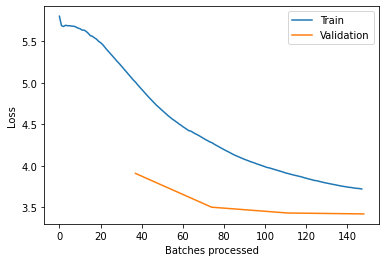

In [17]:
learn.recorder.plot_losses()

In [18]:
from PIL import Image

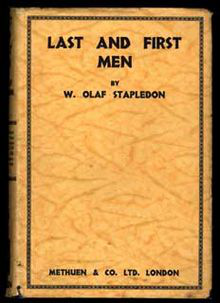

In [19]:
Image.open('../input/last-and-first-men-picture/Last_and_first_Men_picture.jpg')

# **Read the book!**